In [10]:
import pandas as pd
import numpy as  np
import random as rd
import matplotlib.pyplot as plt
from scipy.stats import norm
import yfinance as yf
import datetime as dt

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [13]:
#set start and end dates and number of years of data
years = 1
start = dt.date.today() + dt.timedelta(days = -364*years)
end = dt.date.today()
data = pd.DataFrame()
data = data.append(yf.download('CBSH', start=start, end=end, progress=False))

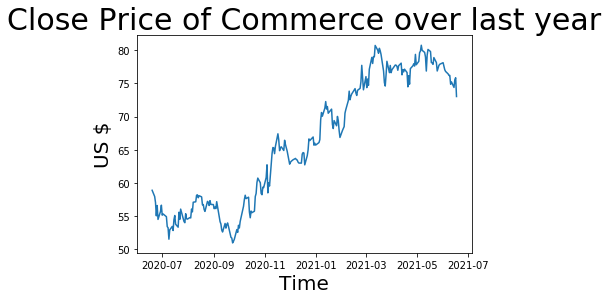

In [14]:
plt.title('Close Price of Commerce over last year', size=30)
plt.xlabel('Time', size=20)
plt.ylabel('US $', size=20)
plt.plot(data['Close'])

In [15]:
data['log_return'] = np.log(data['Close'].shift(-1)/data['Close'])
data.to_csv('commerce_data.csv')

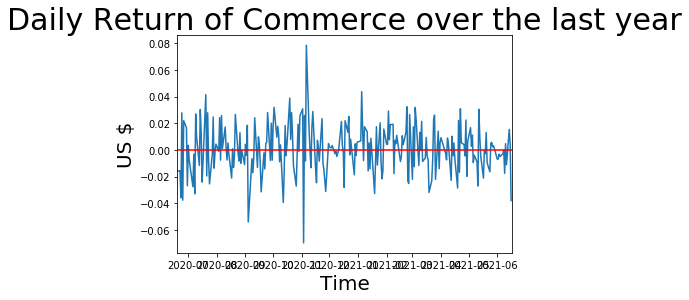

In [17]:
plt.title('Daily Return of Commerce over the last year',size=30)
plt.xlabel('Time', size=20)
plt.ylabel('US $', size=20)
plt.xlim(data.index[0], data.index[-1])
plt.plot(data['log_return'])
plt.axhline(0, color='red')

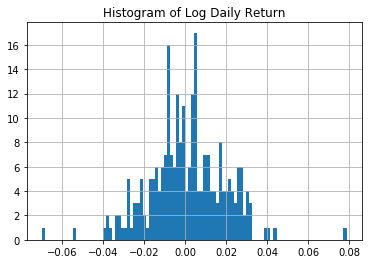

In [20]:
plt.title('Histogram of Log Daily Return')
data['log_return'].dropna().hist(bins=100)

In [21]:
#H_0: average daily return is equal to 0

xbar = data['log_return'].mean()
s = data['log_return'].std(ddof=1)
n = data['log_return'].shape[0]
#*use H_0 here*
zhat = (xbar - 0)/(s/(n**0.5))

In [26]:
#2-Tailed Test
#set significance level alpha
# alpha represents chance of 
# Type 1 Error: we reject the null hypothesis when its actually true
alpha = 0.05
zlower = norm.ppf(alpha/2, 0, 1)
zupper = -zlower
print(zlower, zupper, zhat)

-1.9599639845400545 1.9599639845400545 0.7461569448932305


$$\hat{z}=0.746$$ is well within the bounds

In [28]:
#1-Tailed Test
#H_0: average daily return < or equal to 0

zupper = norm.ppf(1-alpha, 0 ,1)
zupper

1.6448536269514722

In [29]:
#P-Value
p = 1 - norm.cdf(abs(zhat), 0 , 1)
p < alpha

False

In [30]:
p

0.22778630669226918